In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pyplot

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [43]:
import pandas as pd # to dataframes
import matplotlib.pyplot as plt #to define plot parameters
import seaborn as sns #to graphical plots
import numpy as np #to math 

plt.style.use('ggplot') # to plot graphs with gggplot2 style

# To NLP and Word Cloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

In [44]:
url = 'https://raw.githubusercontent.com/WhyseRabbit/med-cabinet-ds/feature/tensor_effects/data/cannabis.csv'
data = pd.read_csv(url)
data.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [45]:
flavors_and_effects = {}

for d in range(len(data)-1):
    try:
        if data.iloc[d]["Flavor"] != "None" and data.iloc[d]["Effects"] != "None":
            for f in data.iloc[d]["Flavor"].split(","):
                if f not in flavors_and_effects:
                    flavors_and_effects[f] = {}
                    flavors_and_effects[f]["timesAppeared"] = 1
                    for e in data.iloc[d]["Effects"].split(","):
                        if e not in flavors_and_effects[f]:
                            flavors_and_effects[f][e] = 1
                        else:
                            flavors_and_effects[f][e] += 1
                else:
                    flavors_and_effects[f]["timesAppeared"] += 1
                    for e in data.iloc[d]["Effects"].split(","):
                        if e not in flavors_and_effects[f]:
                            flavors_and_effects[f][e] = 1
                        else:
                            flavors_and_effects[f][e] += 1

    except:
        pass

delArr = []
for f in flavors_and_effects:
    if len(flavors_and_effects[f])-1 < 1:
        delArr.append(f)
for a in delArr:
    del flavors_and_effects[a]

flavors_short_list = ["Earthy","Sweet","Citrus", "Flowery", "Diesel"]
print("Total Flavors: ", len(flavors_and_effects))
for f in flavors_and_effects:
    if(f in flavors_short_list):
        print(f)
        print("* Total Effects: ", len(flavors_and_effects[f])-1)
        for e in flavors_and_effects[f]:
            if e == "timesAppeared":
                print("*",e, ": ", flavors_and_effects[f][e])
            else:
                print("*",e, ": ", flavors_and_effects[f][e],"--",(flavors_and_effects[f][e] / flavors_and_effects[f]["timesAppeared"])*100, "%")

Total Flavors:  49
Earthy
* Total Effects:  15
* timesAppeared :  1104
* Creative :  322 -- 29.166666666666668 %
* Energetic :  271 -- 24.547101449275363 %
* Tingly :  154 -- 13.949275362318842 %
* Euphoric :  812 -- 73.55072463768117 %
* Relaxed :  902 -- 81.70289855072464 %
* Happy :  949 -- 85.96014492753623 %
* Uplifted :  720 -- 65.21739130434783 %
* Talkative :  154 -- 13.949275362318842 %
* Hungry :  267 -- 24.184782608695652 %
* Giggly :  135 -- 12.228260869565217 %
* Focused :  281 -- 25.45289855072464 %
* Sleepy :  431 -- 39.039855072463766 %
* Aroused :  82 -- 7.427536231884058 %
* Dry :  1 -- 0.09057971014492754 %
* Mouth :  1 -- 0.09057971014492754 %
Sweet
* Total Effects:  13
* timesAppeared :  1052
* Creative :  315 -- 29.942965779467677 %
* Energetic :  297 -- 28.231939163498097 %
* Tingly :  141 -- 13.403041825095057 %
* Euphoric :  791 -- 75.19011406844106 %
* Relaxed :  822 -- 78.13688212927757 %
* Happy :  898 -- 85.36121673003802 %
* Uplifted :  717 -- 68.155893536

In [46]:
effects_and_flavors = {}

for d in range(len(data)-1):
    try:
        if data.iloc[d]["Flavor"] != "None" and data.iloc[d]["Effects"] != "None":
            for f in data.iloc[d]["Effects"].split(","):
                if f not in effects_and_flavors:
                    effects_and_flavors[f] = {}
                    effects_and_flavors[f]["timesAppeared"] = 1
                    for e in data.iloc[d]["Flavor"].split(","):
                        if e not in effects_and_flavors[f]:
                            effects_and_flavors[f][e] = 1
                        else:
                            effects_and_flavors[f][e] += 1
                else:
                    effects_and_flavors[f]["timesAppeared"] += 1
                    for e in data.iloc[d]["Flavor"].split(","):
                        if e not in effects_and_flavors[f]:
                            effects_and_flavors[f][e] = 1
                        else:
                            effects_and_flavors[f][e] += 1

    except:
        pass

delArr = []
for f in effects_and_flavors:
    if len(effects_and_flavors[f])-1 < 1:
        delArr.append(f)
for a in delArr:
    del effects_and_flavors[a]

print("Total Effects: ", len(effects_and_flavors))
for f in effects_and_flavors:
    print(f)
    print("* Total Flavors: ", len(effects_and_flavors[f])-1)
    for e in effects_and_flavors[f]:
        if effects_and_flavors[f][e] / effects_and_flavors[f]["timesAppeared"] > 0.5:
            if e == "timesAppeared":
                print("*",e, ": ", effects_and_flavors[f][e])
            else:
                print("**",e, ": ", effects_and_flavors[f][e],"--",(effects_and_flavors[f][e] / effects_and_flavors[f]["timesAppeared"])*100, "%")

Total Effects:  15
Creative
* Total Flavors:  49
* timesAppeared :  725
Energetic
* Total Flavors:  46
* timesAppeared :  624
Tingly
* Total Flavors:  46
* timesAppeared :  333
Euphoric
* Total Flavors:  49
* timesAppeared :  1600
** Earthy :  812 -- 50.74999999999999 %
Relaxed
* Total Flavors:  49
* timesAppeared :  1692
** Earthy :  902 -- 53.30969267139481 %
Aroused
* Total Flavors:  47
* timesAppeared :  193
Happy
* Total Flavors:  49
* timesAppeared :  1832
** Earthy :  949 -- 51.801310043668124 %
Uplifted
* Total Flavors:  49
* timesAppeared :  1476
Hungry
* Total Flavors:  47
* timesAppeared :  457
** Earthy :  267 -- 58.42450765864332 %
Talkative
* Total Flavors:  45
* timesAppeared :  352
Giggly
* Total Flavors:  47
* timesAppeared :  287
Focused
* Total Flavors:  45
* timesAppeared :  580
Sleepy
* Total Flavors:  49
* timesAppeared :  723
** Earthy :  431 -- 59.612724757952975 %
Dry
* Total Flavors:  2
* timesAppeared :  1
** Earthy :  1 -- 100.0 %
** Chestnut :  1 -- 100.0 %

In [47]:
for f in flavors_and_effects:
    if flavors_and_effects[f]["Relaxed"] / flavors_and_effects[f]["timesAppeared"] < 0.60:
        print(f)
        print("* Total Effects: ", len(flavors_and_effects[f])-1)
        for e in flavors_and_effects[f]:
            if e == "timesAppeared":
                print("*",e, ": ", flavors_and_effects[f][e])
            else:
                print("*",e, ": ", flavors_and_effects[f][e],"--",(flavors_and_effects[f][e] / flavors_and_effects[f]["timesAppeared"])*100, "%")

Apple
* Total Effects:  12
* timesAppeared :  16
* Euphoric :  11 -- 68.75 %
* Relaxed :  9 -- 56.25 %
* Uplifted :  12 -- 75.0 %
* Creative :  7 -- 43.75 %
* Happy :  10 -- 62.5 %
* Energetic :  6 -- 37.5 %
* Aroused :  1 -- 6.25 %
* Tingly :  6 -- 37.5 %
* Focused :  7 -- 43.75 %
* Sleepy :  7 -- 43.75 %
* Hungry :  1 -- 6.25 %
* Giggly :  1 -- 6.25 %
Minty
* Total Effects:  13
* timesAppeared :  41
* Euphoric :  31 -- 75.60975609756098 %
* Focused :  13 -- 31.70731707317073 %
* Energetic :  16 -- 39.02439024390244 %
* Relaxed :  24 -- 58.536585365853654 %
* Creative :  16 -- 39.02439024390244 %
* Happy :  29 -- 70.73170731707317 %
* Uplifted :  29 -- 70.73170731707317 %
* Tingly :  9 -- 21.951219512195124 %
* Giggly :  7 -- 17.073170731707318 %
* Talkative :  12 -- 29.268292682926827 %
* Aroused :  6 -- 14.634146341463413 %
* Sleepy :  9 -- 21.951219512195124 %
* Hungry :  3 -- 7.317073170731707 %


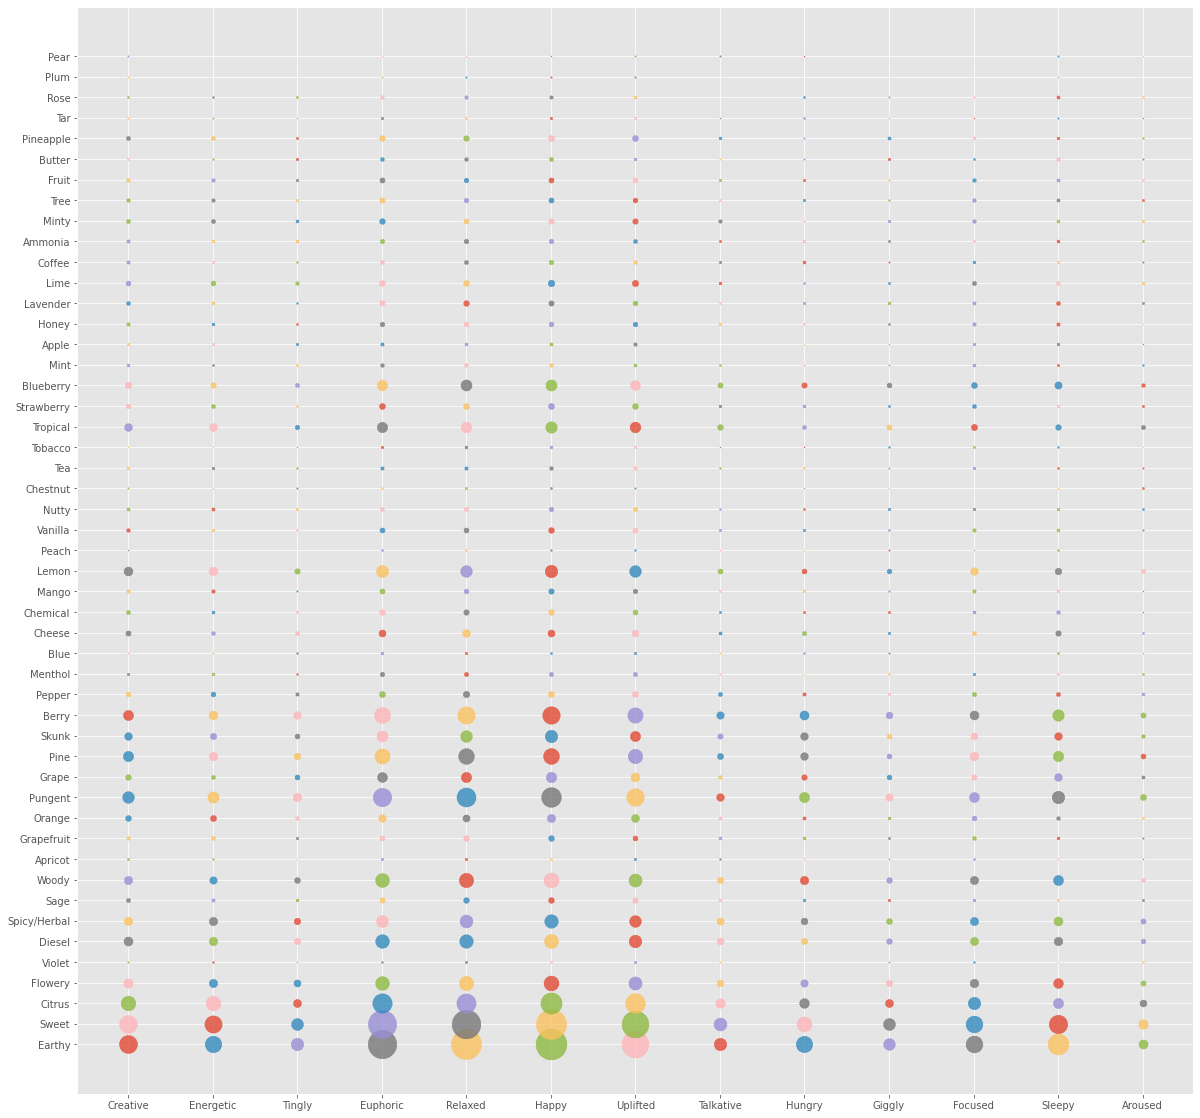

In [48]:
pyplot.figure(figsize=(20,20))
for f in flavors_and_effects:
    for e in flavors_and_effects[f]:
        if e not in ["timesAppeared","Dry","Mouth"]:
            pyplot.scatter(e,f,flavors_and_effects[f][e], alpha=0.8)

pyplot.show()

Distribution of Species (Types)
We have 3 principal type of cannabis:

Indicas
Sativas
Hybrid

In [49]:
data['Type'] = data.Type.astype(str)
#Here looking though the data to see the structure
print(data.nunique())

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64


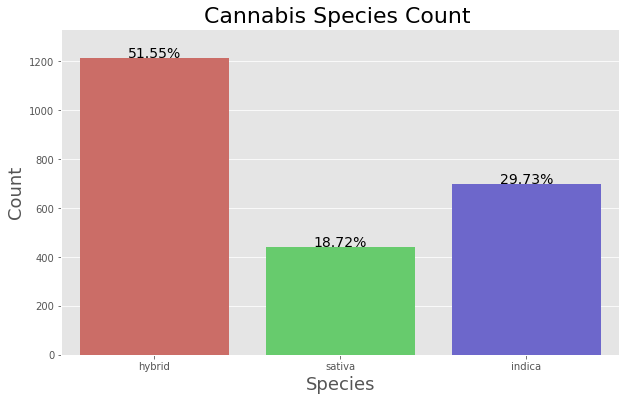

In [50]:
total = len(data)
plt.figure(figsize=(10,6))

g = sns.countplot(x="Type", data=data, 
                  palette='hls', color='blue')
g.set_title("Cannabis Species Count ", fontsize=22)
g.set_xlabel('Species', fontsize=18)
g.set_ylabel('Count', fontsize=18)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [51]:
print("Rating Distribuition by Species Type")
pd.crosstab(data[data.Rating > 3.0]['Rating'], data.Type).T

Rating Distribuition by Species Type


Rating,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Type,,,,,,,,,,,,,,,,,,,,
hybrid,1,1,2,2,5,6,7,9,9,62,56,113,150,144,164,114,95,88,31,102
indica,0,2,0,1,2,4,5,10,12,24,33,64,89,83,94,78,47,41,19,70
sativa,0,0,1,2,2,1,4,4,8,18,12,48,58,57,59,50,22,30,9,38


In [52]:
#I will extract the values in Effects and Flavor and pass to a new column
df_effect = pd.DataFrame(data.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(data.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [53]:
#Concatenating the new variables with strains
data = pd.concat([data, df_effect], axis=1)
data = pd.concat([data, df_flavors], axis=1)

#Looking the result
data.head()

data.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

In [54]:
# Feature
# geting total words in review
data['count_word'] = data["Description"].apply(lambda x: len(str(x).split()))

# geting total letters in review
data['count_letters'] = data["Description"].apply(lambda x: len(str(x)))

# geting mean lenght of words
data["mean_word_len"] = data["Description"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

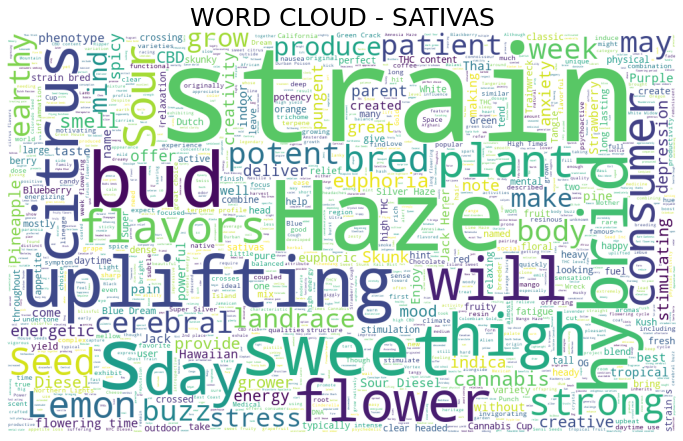

In [55]:
stopwords = set(STOPWORDS)
newStopWords = ['strains','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(data[data.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()

Encoding target

In [56]:
data["Type"] = pd.factorize(data["Type"])[0]
del data["Description"]

Dummy features

In [57]:
dummy = pd.get_dummies(data[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])

In [58]:
#Concatenating the result and droping the used variables 
data = pd.concat([data, dummy], axis=1)

data = data.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4',
                        'Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

data.shape

(2351, 237)

Importing Sklearn and Modeling

In [59]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (/Users/marianvinas/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/utils/fixes.py)

In [39]:
# setting X and y
X = data.drop("Type",1)
y = data["Type"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

ValueError: could not convert string to float: 'Creative,Energetic,Tingly,Euphoric,Relaxed'